# Probability distributions - 1

**ToC**
 - [Axioms of probability](#Axioms-of-probability)
 - [Conditional probability](#Conditional-probability)
   - [Bayesian conditional probability](#Bayesian-conditional-probability)
 - [Random variables](#Random-variables)
   - [Properties of discrete random variables](#Properties-of-discrete-random-variables)
   - [Binomial and Poisson discrete random variables](#Binomial-and-Poisson-discrete-random-variables)

### Axioms of probability
$$
0 \leq P(A) \leq 1
\\
P(A) + P(\bar A) = 1
\\
P(A \verb ! or ! B) = P(A) + P(B)
$$

Probability ranges from 0 to 1. The sum of P(A) and the opposite of A occuring is 1. For mutually exclusive events A and B, the Probability of either A or B ocurring is sum of their probabilities.

**Mutually exclusive**: Two events are considered mutually exclusive, if when an event is performed once, the occurrence of one of the events excludes the possibility of another.

For two independent events, probabilities of their union and intersection can be represented as

$$
P(A \cup B) = P(A) + P(B) - P(A \cap B)
$$

If A and B are mutually exclusive, then $P(A \cap B) = 0$

The reason we negate `P(A intersection B)` can be seen from the venn diagram below. Probabilities of A and B are (0.5 and 0.2). The probability of both A and B ocurring is 0.05. Thus to not double count the intersection, we negate it.

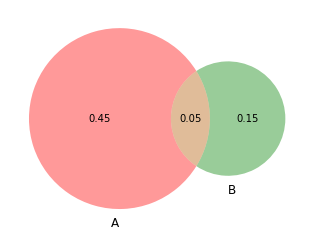

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib_venn import venn2
venn2(subsets = (0.45, 0.15, 0.05), set_labels = ('A', 'B'))

## Conditional Probability
Generally, conditional probability is more helpful in explaining a situtation than general probabilities.

Given two events `A` and `B` with non zero probabilities, then the probability of A occurring, given that B has occurs is

$$
P(A|B) = \frac{P(A \cap B)}{P(B)}
$$

and
$$
P(B|A) = \frac{P(A \cap B)}{P(A)}
$$

The $P(A/B)$ probability of A given that B occurs, is the probability of A and B occurring $P(A \cap B)$ to the probability of B occurring $P(B)$. Thus if `A` and `B` are `mutually exclusive`, then there is no conditional probability.

### Bayesian conditional probability
The Bayesian theorem builds on conditional probability, specifically on prior and posterior probabilities. It states that, if `A` and `B` are any events whose probabilities are not 0 or 1, then:

$$
P(A|B) = \frac{P(B|A)P(A)}{P(B|A)P(A) + P(B|\bar A)P(\bar A)}
$$

In reality, we expand the $\bar A$ case. Thus if $A_1 ,... A_k$ are mutually exclusive `states of nature` and if $B_1 .. B_m$ are `m` possible mutually exclusive observable events, then,

$$
P(A_i | B_j) = \frac{P(B_j | A_i)P(A_i)}{P(B_j | A_1)P(A_1) + P(B_j | A_2)P(A_2) + ... + P(B_j | A_k)P(A_k)}
$$

## Random variables
When the objective is to predict the category (qualitative, such as predicting political party affiliation), we term the it as predicting a **`qualitative random variable`**. On the other hand, if we are predicting a quantitative value (number of cars sold), we term it a **`quantitative random variable`**.

When the observations of a `quantitative random variable` can assume values in a continuous interval (such as predicting temperature), it is called a **`continuous random variable`**.

### Properties of discrete random variable
Say, we are predicting the probability of getting heads in two coin tosses P(y). Then 

 - probability of y ranges from 0 and 1
 - sum of probabilities of all values of y = 1
 - probabilities of outcomes of discrete random variable is additive. Thus probability of y = 1 or 2 is P(1) + P(2)
 
### Binomial and Poisson discrete random variables
A **binomial** experiment is one in which the outcome is one of two possible outcomes. Coin tosses, accept / reject, pass / fail, infected / uninfected, these are the kinds of studies that involve a binomial experiment. Thus an experiment is of binomial in nature if
 - experiment has `n` identical trials
 - each trial results in 1 of 2 outcomes ( success and failure )
 - probability of one of the outcome, say success remains the same for all trials
 - trials are independent of each other
 - the random variable `y` is the number of successes observed in `n` trials.

The probability of observing `y` success in `n` trials of a binomial experiment is
$$
P(y) = \frac{n!}{y!(n-y)!}\pi^y (1-\pi)^{n-y}
$$

where 
 - n = number of trials
 - $\pi$ = probability of success in a single trial
 - $1-\pi$ = probability of failure in a single tiral
 - `y` = number of successes in `n` trials
 - $n!$ (n factorial) = $n(n-1)(n-2)..(n-(n-1))$

In [7]:
import math

def bin_prob(n,y,pi):
    a = math.factorial(n)/(math.factorial(y)*math.factorial(n-y))
    b = math.pow(pi, y) * math.pow((1-pi), (n-y))
    p_y = a*b
    return p_y

In [11]:
bin_prob(20,17,0.85)

0.24282889614926761

In [17]:
x =[]
y =[]
cum_prob = []
for i in range(1,21):
    x.append(i)
    p_y = bin_prob(20,i,0.85)
    print(str(i) + "  " + str(p_y))
    y.append(p_y)
    
    if i==1:
        cum_prob.append(p_y)
    else:
        cum_prob.append(cum_prob[i-2] + p_y)

1  3.768624294090281e-15
2  2.028776078318601e-13
3  6.897838666283242e-12
4  1.6612294787965472e-10
5  3.012362788217739e-09
6  4.267513949975129e-08
7  4.836515809971812e-07
8  4.45362497501571e-06
9  3.364961092234091e-05
10  0.00020974924141592494
11  0.0010805263951729465
12  0.004592237179485021
13  0.01601395529256315
14  0.04537287332892893
15  0.1028451795455722
16  0.18212167211195074
17  0.24282889614926761
18  0.22933840191875274
19  0.13679834500416826
20  0.03875953108451433


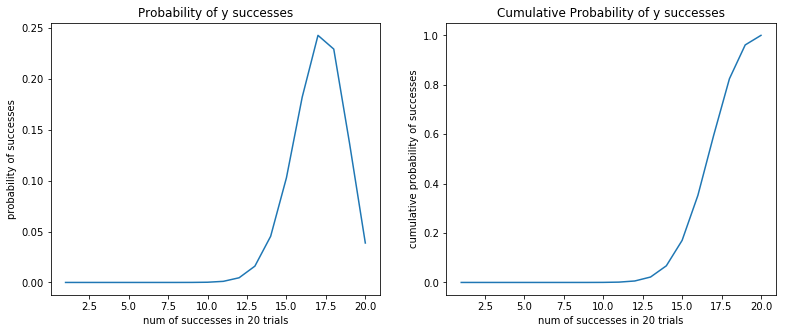

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(1,2, figsize=(13,5))
ax[0].plot(x,y)
ax[0].set_title('Probability of y successes')
ax[0].set_xlabel('num of successes in 20 trials')
ax[0].set_ylabel('probability of successes')

ax[1].plot(x,cum_prob)
ax[1].set_title('Cumulative Probability of y successes')
ax[1].set_xlabel('num of successes in 20 trials')
ax[1].set_ylabel('cumulative probability of successes')
